In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

### Implementation of Decision Tree

In [8]:
dtree = DecisionTreeClassifier(random_state=0)

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
pred=dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, pred)

0.6

### Visualizing Decision Tree

In [13]:
from sklearn import tree

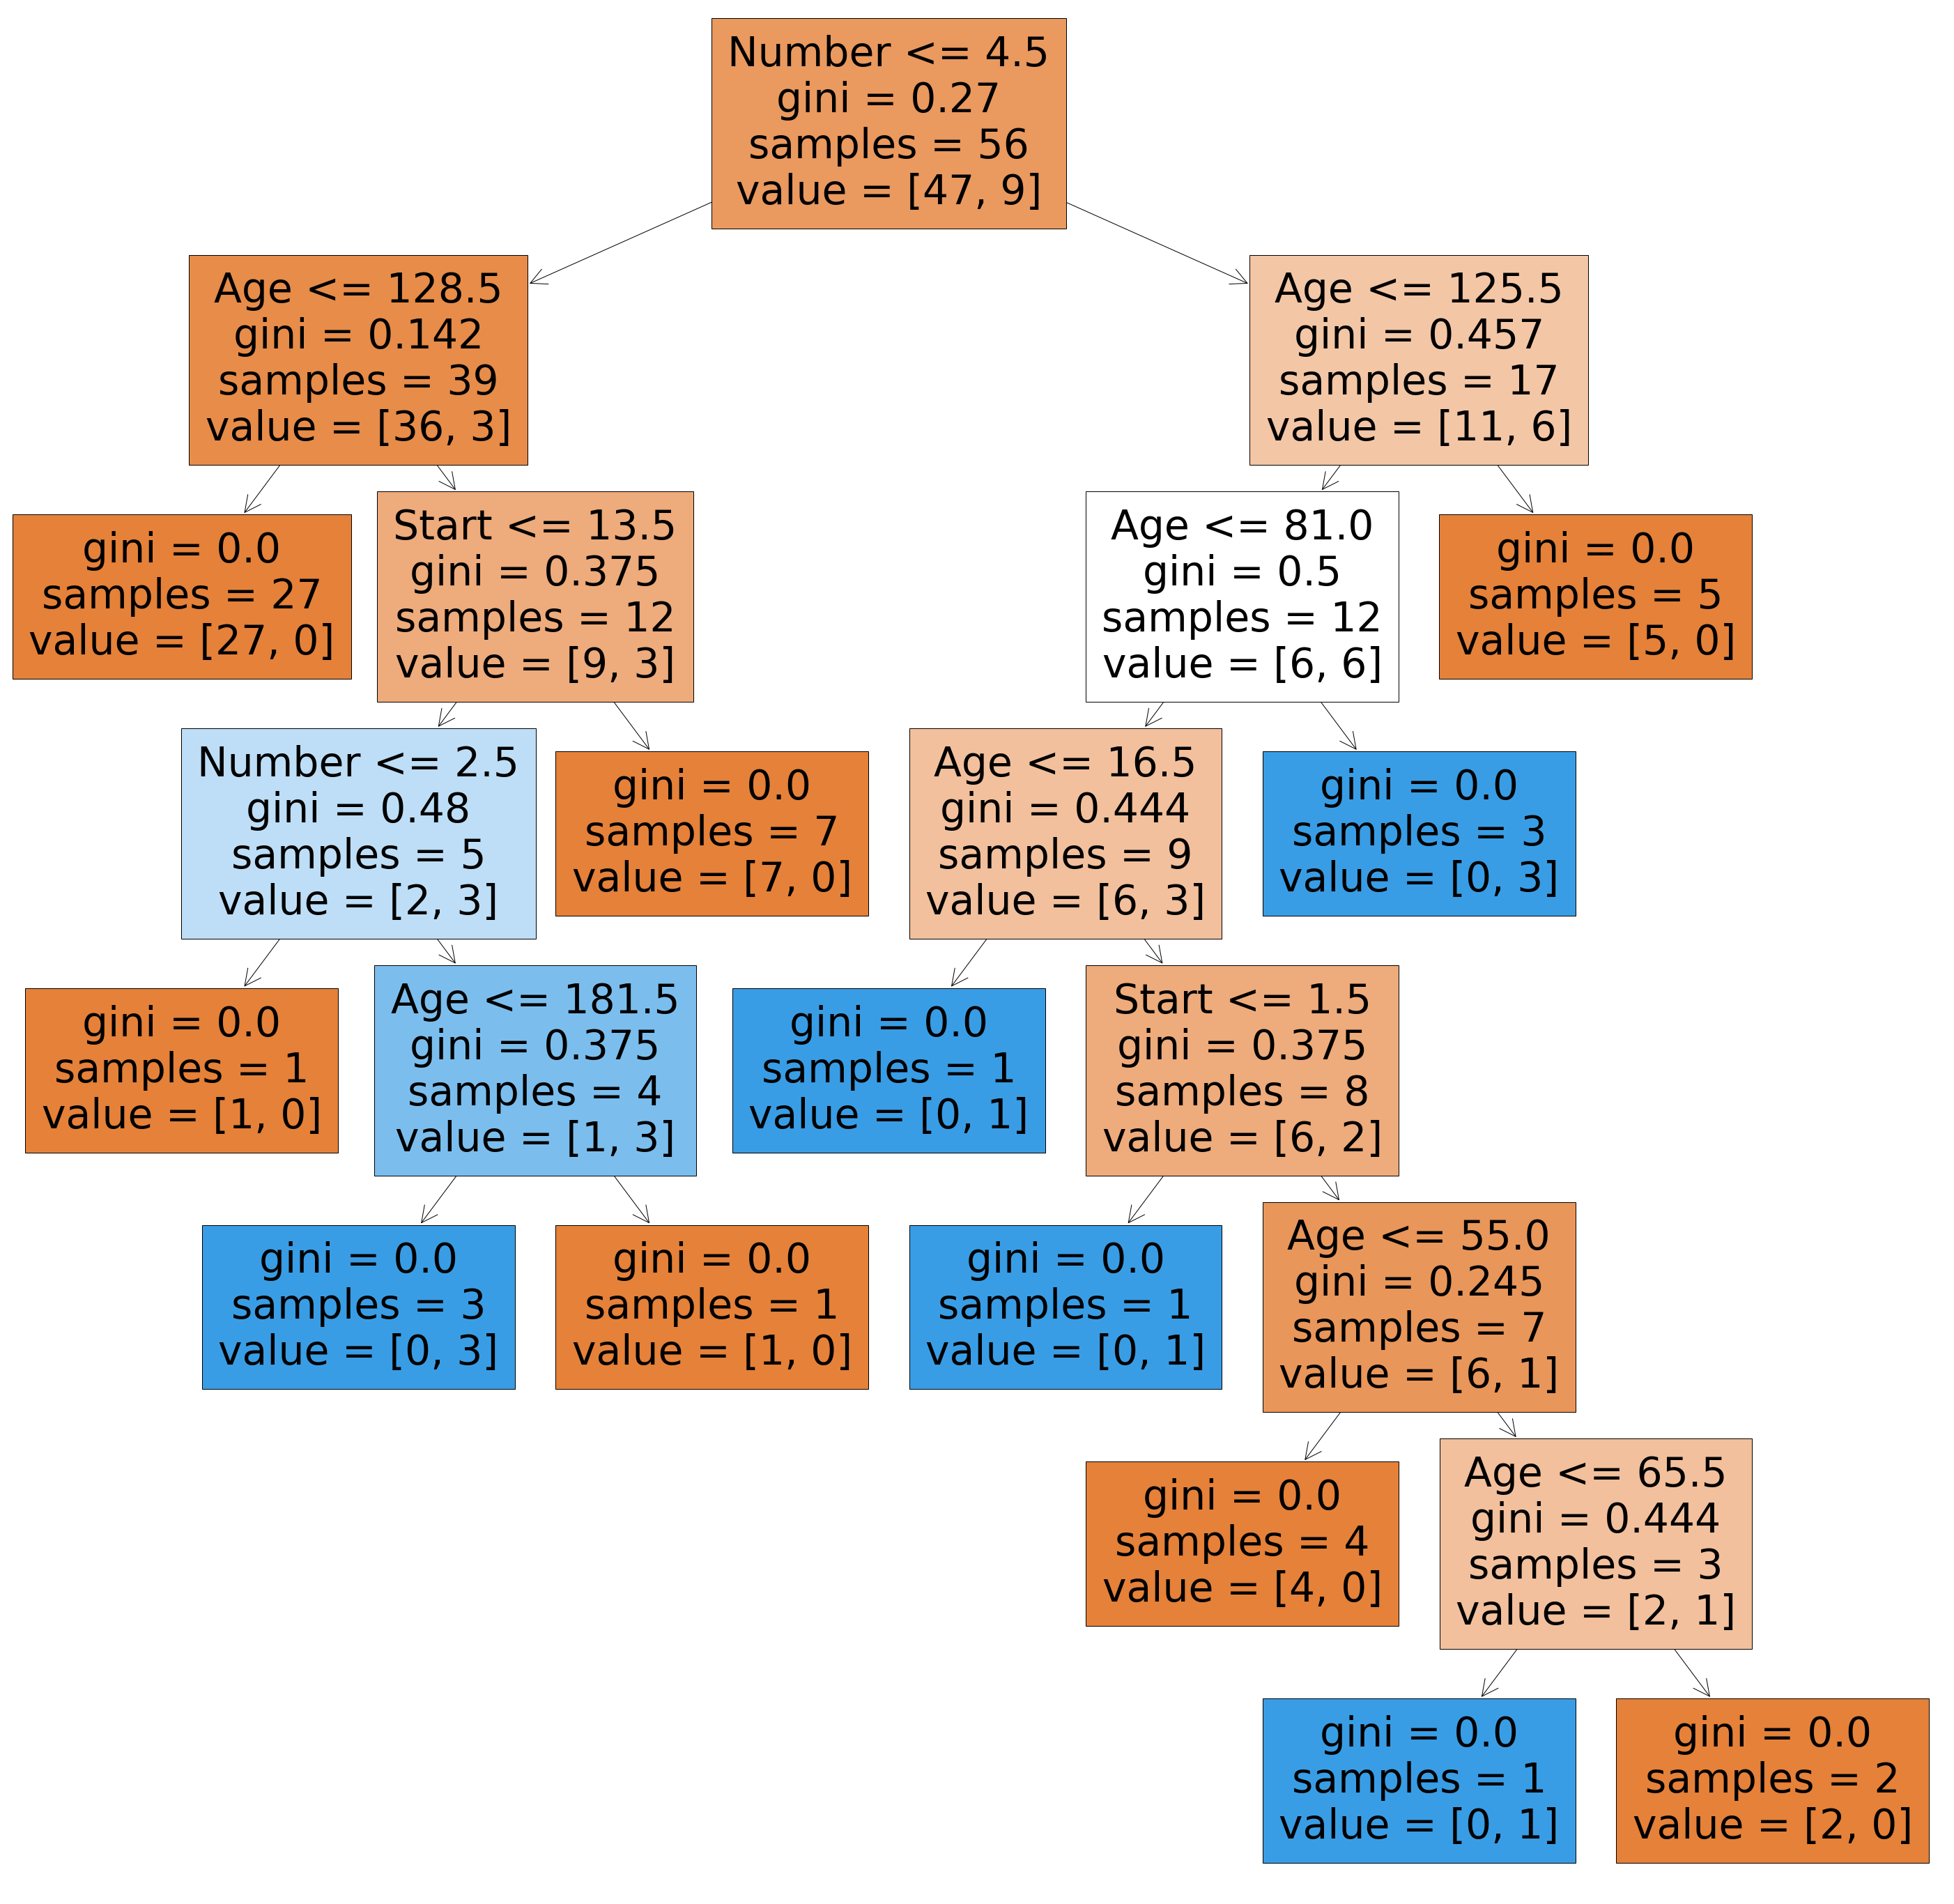

In [14]:
fig = plt.figure(figsize=(50,50))
a= tree.plot_tree(dtree,filled=True,feature_names=list(df[['Age', 'Number', 'Start']]))

### Improve Decision Tree's Accuracy by Finding best alpha

In [15]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas= path.ccp_alphas

In [16]:
values = []
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree.fit(X_train, y_train)
    values.append(dtree)

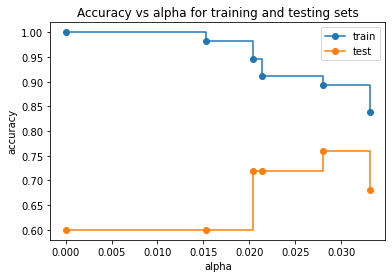

In [17]:
train_scores = [dtree.score(X_train, y_train) for dtree in values]
test_scores = [dtree.score(X_test, y_test) for dtree in values]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [18]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.027)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.027, random_state=0)

In [19]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.72

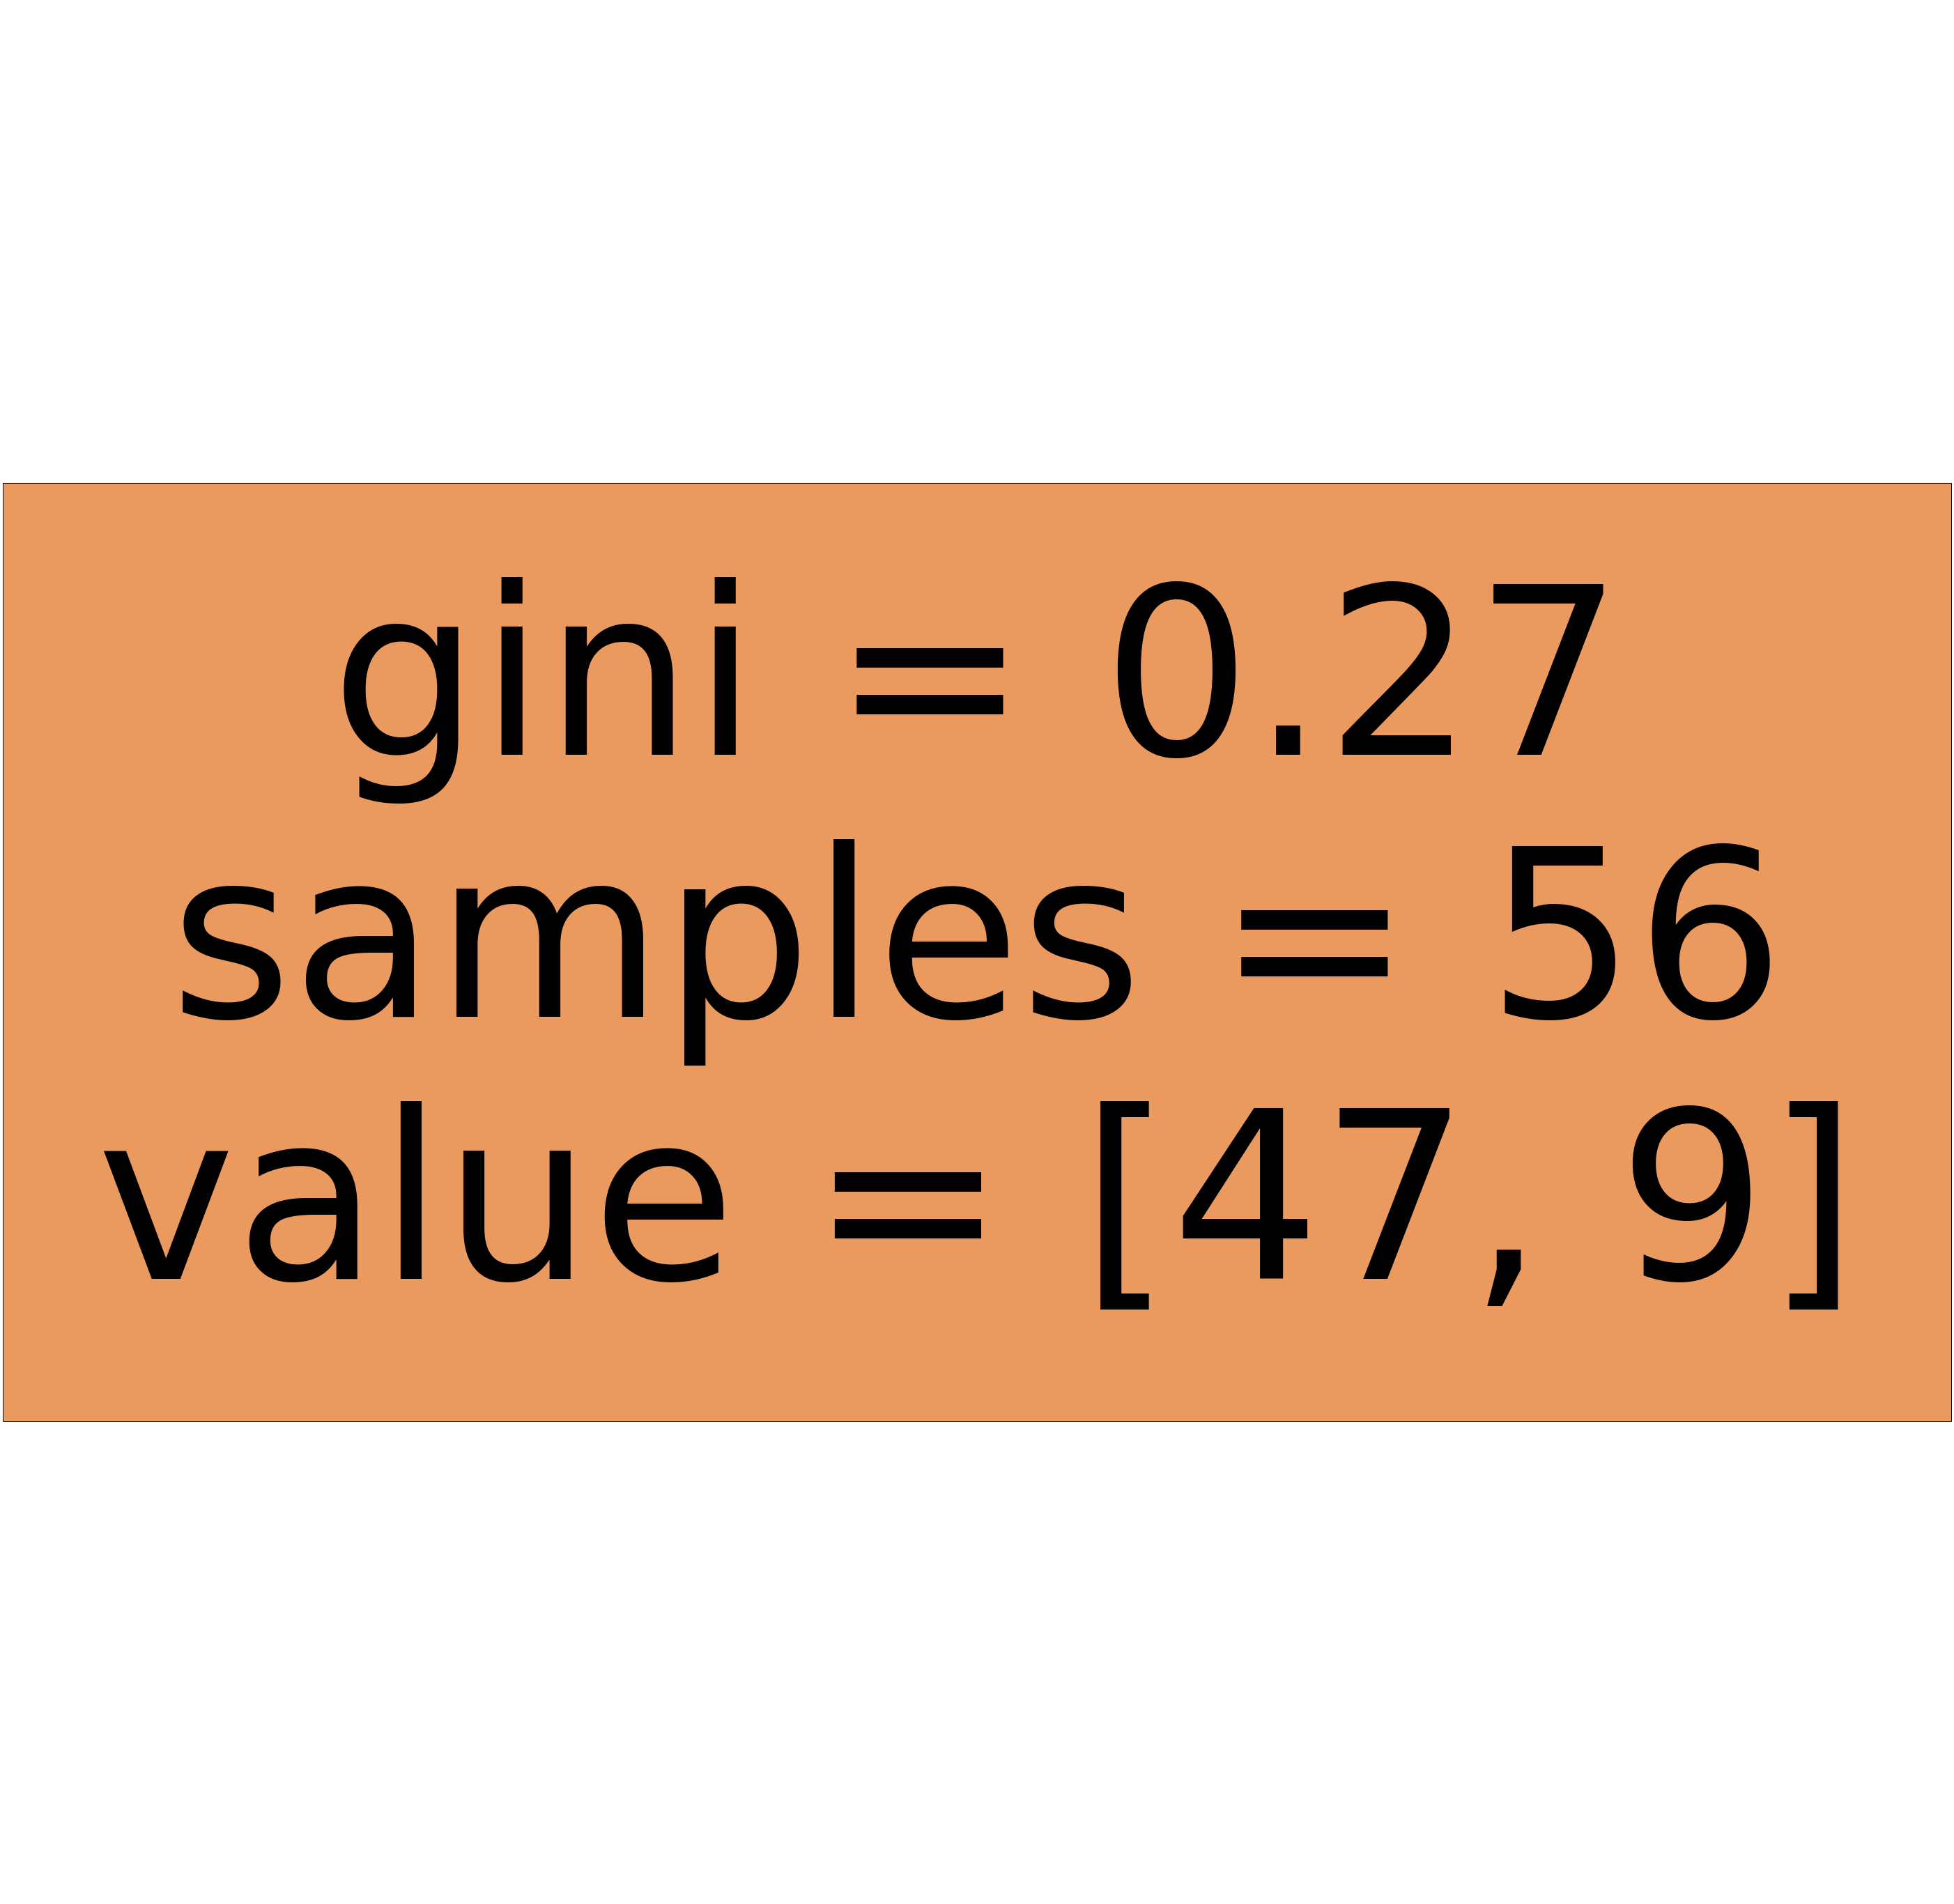

In [20]:
fig = plt.figure(figsize=(50,50))
a=tree.plot_tree(dtree,filled=True,feature_names=list(df[['Age', 'Number', 'Start']]))

### Implementation of Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rforest=RandomForestClassifier(n_estimators=100)

In [23]:
rforest.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
pred=rforest.predict(X_test)

In [25]:
accuracy_score(pred,y_test)

0.76

### Improve Random Forest Accuracy by Finding best estimators

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [28]:
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200,300,400,500],
    'max_features':randint(1,3),
    'criterion':['gini','entropy'],
    'bootstrap':[True,False],
    'min_samples_leaf':randint(1,4)}

In [30]:
def hypertuning_rscv(est, p_distr, nbr_iter,X_train,y_train):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,n_jobs=-1, n_iter=nbr_iter, cv=9)

    rdmsearch.fit(X_train,y_train)
    ##ht_params = rdmsearch.best_params_
    ##ht_score = rdmsearch.best_score_
    ##return ht_params, ht_score

In [31]:
##rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train, y_train)

In [34]:
##rf_parameters

In [35]:
rforest=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=10,max_features=1,min_samples_leaf=2,n_estimators=400)

In [36]:
rforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=1,
                       min_samples_leaf=2, n_estimators=400)

In [37]:
pred=rforest.predict(X_test)

In [38]:
accuracy_score(pred,y_test)

0.72